# Customer Segmentation using K-Mean Clustering 

* A portfolio projectd dedicated to use scikit-learn module in implementing the K-mean clustering method for customer segmentation 
* Aim to better target the promotion based on customer classes after segmentation 
* Could further carry out A/B testing based on the segmented customer database 
* Potentially help the marketing team to target the right customer while promoting an events

![](./images/grocery.jpg)

## About the customer data

* The customer data is obtained from the https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


In [72]:
# Import library 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score
from scipy.stats.mstats import trimmed_var


In [91]:
# Read the data 
df = pd.read_csv('/Users/kang/Documents/Portfolio/Customer-data/marketing_campaign.csv',delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 1.0 Exploratory Data analysis
To understand the dataset features through general data exploration

### 1.1 Information about the data 

In [92]:
print('Total Records are:', len(df))
df.describe()


Total Records are: 2240


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [134]:
print('There are Null data found in dataset')
df.info()

There are Null data found in dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  N

In [136]:
#To remove the NA values
df= df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


## 2.0 Clustering using multiple features

For K-Mean Clustering method, we specifically look into the numerical data as importance features for clustering purpose. In our work, we will be adopting multiple features for clustering purpose, rather than just focus in two features. To ease the clustering process and feature selection, we drop the categorical data. Using model like k-mode clustering might work better for cateogrical data. 

In [137]:
df_all_features = df.drop(columns=['ID','Year_Birth', 'Education', 'Marital_Status','Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'])

The larger variance might indicates a better clustering purpose as the data is more spread out. However, we do need to check the skewness of each features column. If selected feature is skewed, trimmed variance might need to be applied

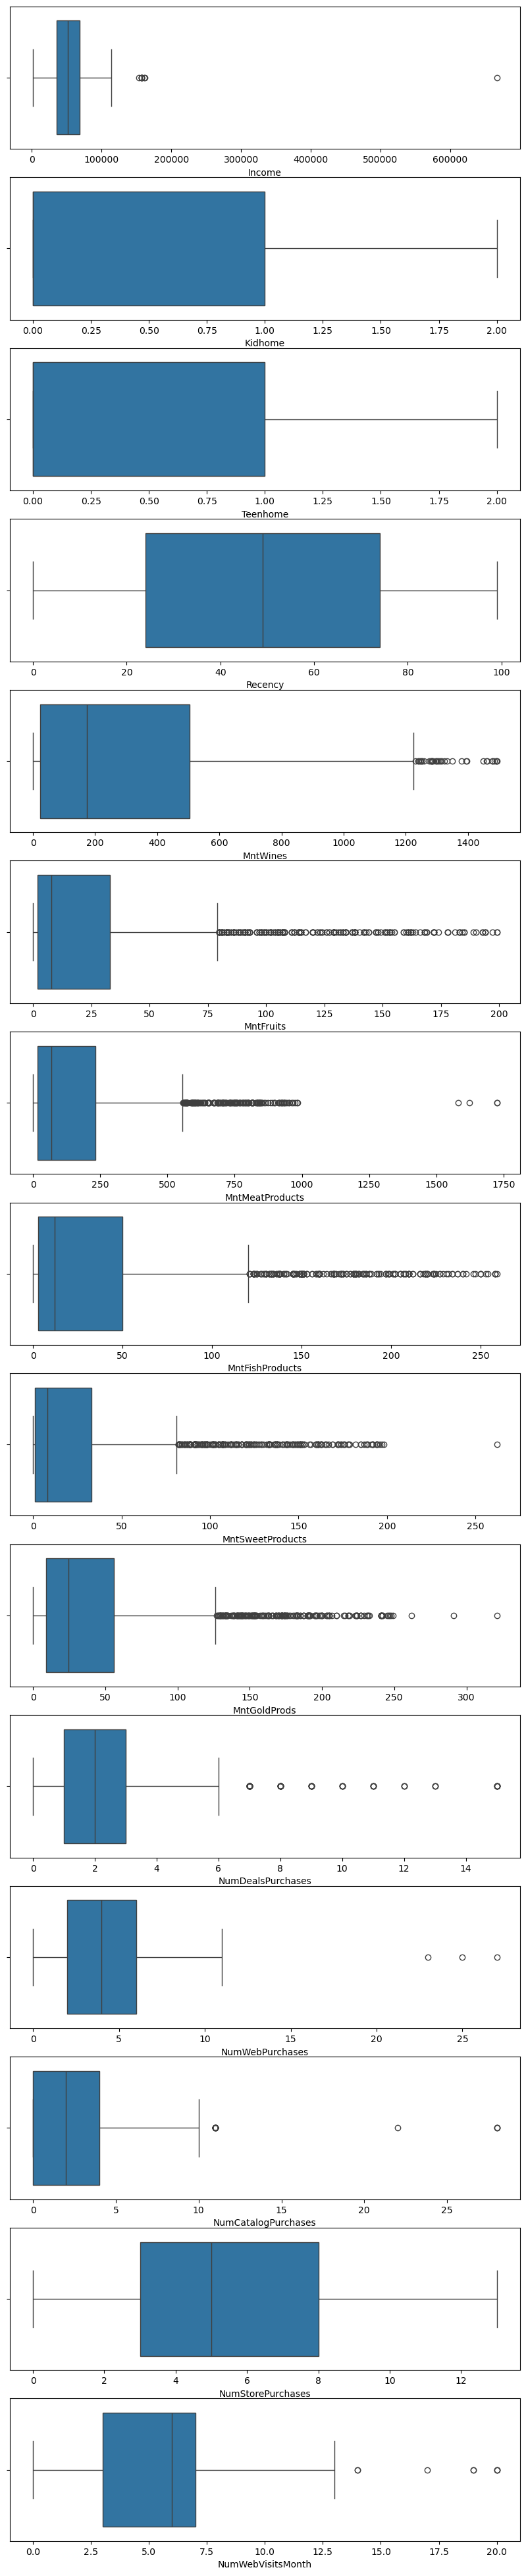

In [138]:
fig, axes = plt.subplots(len(df_all_features.columns),1, figsize=(10, 50))  # Adjust the figure size as needed

for i, col in enumerate(df_all_features.columns):
    sns.boxplot(x=df_all_features[col], ax=axes[i])
    # axes[i].set_title(col)

plt.show()

Since some of data seem to be skewed, we trimmed the variance to check either the top feature will be changed after variance trimming

In [196]:
## top feature before trimming 
features_high_variance = df_all_features.var().sort_values().tail(5)
features_high_variance

MntGoldProds       2.684837e+03
MntFishProducts    2.997791e+03
MntMeatProducts    5.030299e+04
MntWines           1.137901e+05
Income             6.336838e+08
dtype: float64

In [197]:
features_trimmed = df_all_features.apply(func=trimmed_var).sort_values().tail(5)
features_trimmed

MntGoldProds       8.260097e+02
MntFishProducts    8.895623e+02
MntMeatProducts    1.641430e+04
MntWines           5.575440e+04
Income             2.438078e+08
dtype: float64

In [198]:
## before and after trimming showed not much difference the features selected 
selected_features = features_trimmed.index

df_features = df_all_features[selected_features]
df_features

,MntGoldProds,MntFishProducts,MntMeatProducts,MntWines,Income
0,88,172,546,635,58138.0
1,6,2,6,11,46344.0
2,42,111,127,426,71613.0
3,5,10,20,11,26646.0
4,15,46,118,173,58293.0
...,...,...,...,...,...
2235,247,42,182,709,61223.0
2236,8,0,30,406,64014.0
2237,24,32,217,908,56981.0
2238,61,80,214,428,69245.0


### Important Message for feature selection
From the selected features, the 'PRODUCT' feature and the income are with the greater variance which can serve as a better indicator when coming to segment the customer we are having in our database. Features such as kidhome, teenhome might not be a good indicator for that as the data is not in high variance which enable a better classification

### 2.1 Standard Scaler for all the features
Prior building the K-Means model, we need to standardize the value within all our feature column for ease of computation.

Message learnt from Worldquant University Data Science Lab: (https://learn.wqu.edu/)

Standardization is a widely used scaling technique to transform features before fitting into models. Feature scaling changes all a dataset's continuous features to give us a more consistent range of values. Specifically, we subtract the mean from each data point and then divide by the standard deviation with the help of scikit-learn modules.

The goal of standardization is to improve model performance having all continuous features be on the same scale. It's useful in at least two circumstances:

* For machine leaning algorithms that use Euclidean distance (k-means and k-nearest neighbors), different scales can distort the calculation of distance and hurt model performance.
* For dimensionality reduction (principal component analysis), it can improve the model's ability to finds combinations of features that have the most variance.

In [199]:
data_summary = df_features.aggregate(['mean','std']).astype(int)

In [200]:
data_summary

,MntGoldProds,MntFishProducts,MntMeatProducts,MntWines,Income
mean,43,37,166,305,52247
std,51,54,224,337,25173


In [201]:
## Instantiate the transformer from scikit-learn
scaler = StandardScaler()

## transform the df_features' data
X_scaled_data = scaler.fit_transform(df_features) # rename as X_scaled_data because X normally refer to input data in machine learning

## Putting the scaled data back into dataframe

X_scaled = pd.DataFrame(X_scaled_data,columns=df_features.columns)

print("X_scaled shape:", X_scaled.shape)
X_scaled.head()


X_scaled shape: (2216, 5)


,MntGoldProds,MntFishProducts,MntMeatProducts,MntWines,Income
0,0.850031,2.454568,1.690227,0.978226,0.234063
1,-0.732867,-0.651038,-0.717986,-0.872024,-0.234559
2,-0.037937,1.340203,-0.178368,0.358511,0.769478
3,-0.752171,-0.504892,-0.655551,-0.872024,-1.017239
4,-0.559135,0.152766,-0.218505,-0.391671,0.240221


In [202]:
# to check either the data is scaled accoridngly
X_scaled.aggregate(['mean','std']).astype(int)

,MntGoldProds,MntFishProducts,MntMeatProducts,MntWines,Income
mean,0,0,0,0,0
std,1,1,1,1,1


### 2.2 Clustering, determination of how many cluster should be applied 

The number of clusters are determined through elbow method by deriving the inertia and silhouette score 

In [203]:
## there is a future warning on Kmeans module, try to ignore it, to make our code looks clean 

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [204]:
# set a range of cluster intended 

nclusters = range(2,11)

# have two lists to store the inertia and silhouette scores 
inertia_errors = []
silhouette_scores = []

# loop through the cluster using ncluster to train K-mean model, getting the inertia and silhouette scores

for i in nclusters:
    
    # instantiate model
    model = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=i,random_state=10)
    )
        
    # train the model 
    model.fit(df_features)
    
    # get the inertia scores
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
        
    # get the silhouette scores
    silhouette_scores.append(
        silhouette_score(df_features,model.named_steps['kmeans'].labels_)
    )
    
print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [6252.699287760409, 5155.7134801505945, 4445.513711370615]

Silhouette Scores: [0.47632441775010176, 0.2739172294089761, 0.21453054536556962]


### 2.2 Elbow method in determining the number of clusters


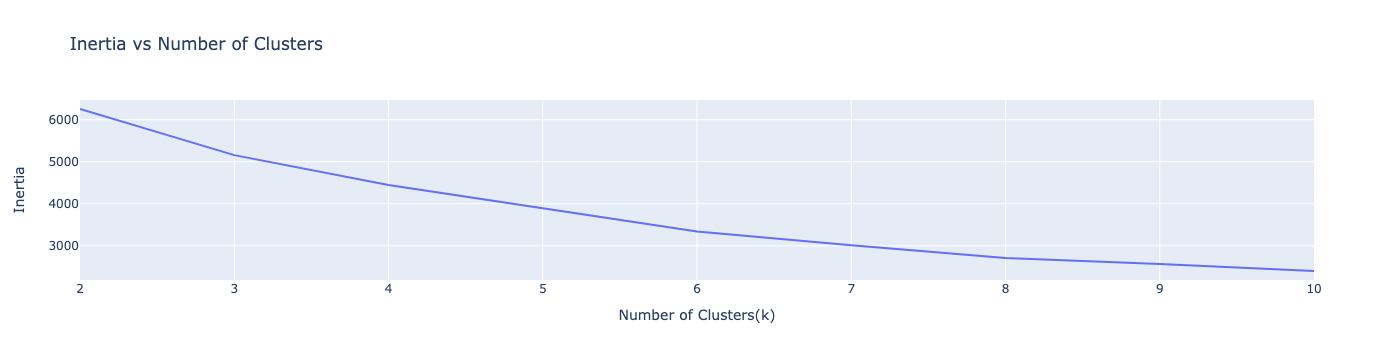

In [205]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(x=nclusters,y=inertia_errors,title='Inertia vs Number of Clusters')

fig.update_layout(xaxis_title='Number of Clusters(k)',yaxis_title='Inertia')
fig.show()

Interpretation: The line flatten at 3 or 4 clusters 



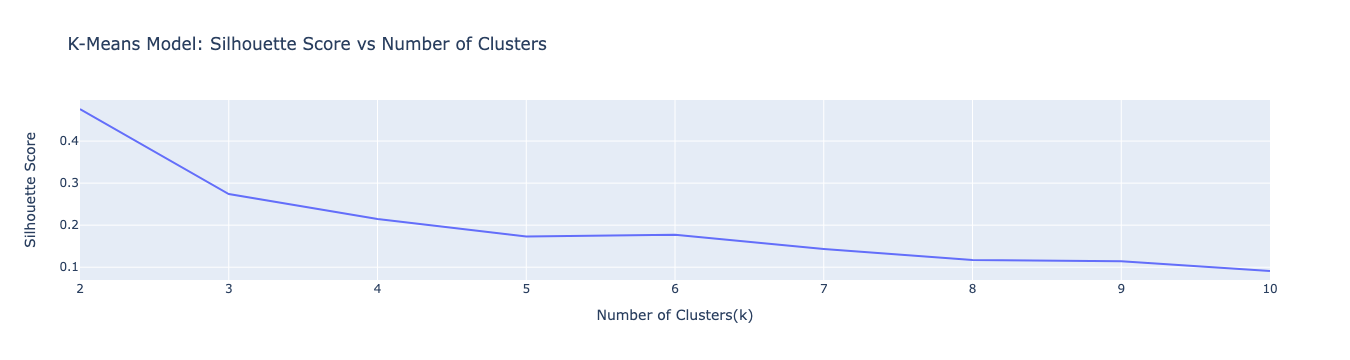

In [206]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = fig = px.line(x=nclusters,y=silhouette_scores,
                    title='K-Means Model: Silhouette Score vs Number of Clusters')
fig.update_layout(xaxis_title='Number of Clusters(k)',yaxis_title='Silhouette Score')


fig.show()

Interpretation: the silhouette score higher at 3 compared to 4, 

Putting the information from this plot together with our inertia plot, it seems like the best setting for `n_clusters` will be 3. 

In [207]:
# building the final model
final_model = make_pipeline(
    StandardScaler(),
    KMeans(random_state=42,n_clusters=3)
)
final_model.fit(df_features)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

## 3.0 Conveying the message 

In [208]:
labels = final_model.named_steps.kmeans.labels_
print(labels[:5])

[2 1 0 1 1]


In [218]:
# group the cluster by using the labels defined from our K-Mean clustering model
segmented_df = df_features.groupby(labels).mean()

In [210]:
segmented_df

,MntGoldProds,MntFishProducts,MntMeatProducts,MntWines,Income
0,74.602024,33.983137,187.553120,563.006745,64619.772344
1,16.357500,9.047500,31.761667,71.772500,36936.723333
2,79.335697,123.867612,521.820331,605.420804,78336.444444


In [219]:
# the value of income is much higher than the products. Hence, we might visualise it seperately

segmented_without_income = segmented_df.drop(columns='Income')

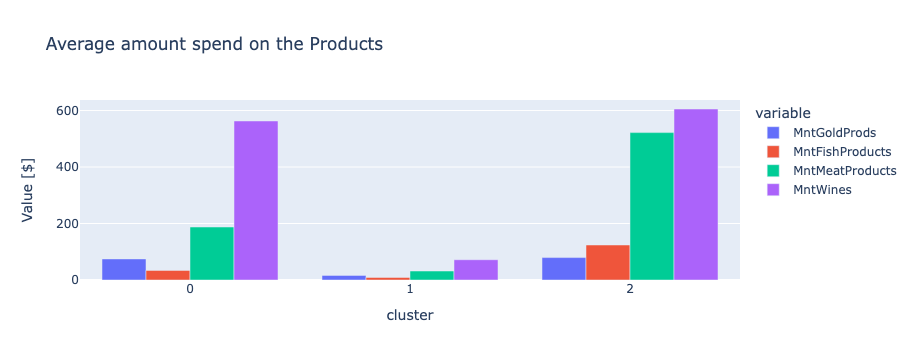

In [220]:
# Create side-by-side bar chart of segmented without income 
fig = px.bar(segmented_without_income,
            barmode="group",
            title="Average amount spend on the Products")
fig.update_layout(xaxis_title='cluster',yaxis_title='Value [$]')
fig.show()

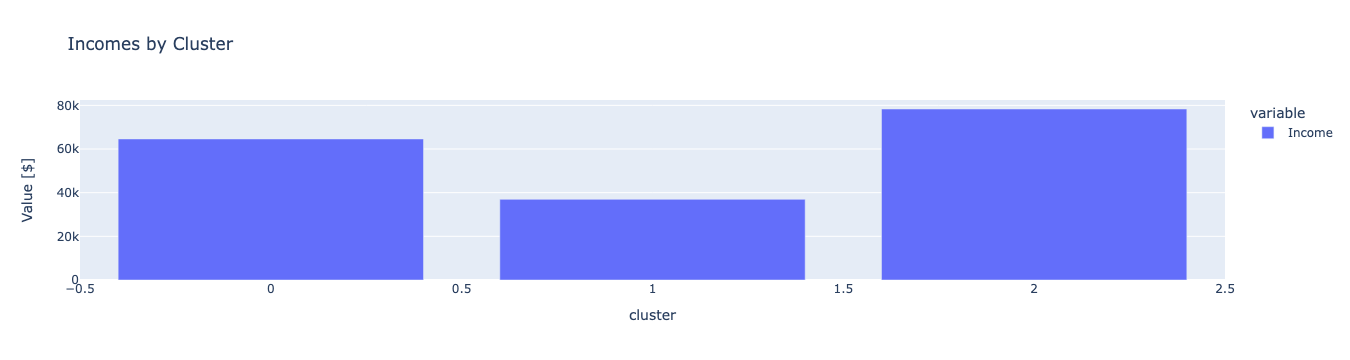

In [222]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(segmented_df['Income'],
            # barmode="group",
            title="Incomes by Cluster")
fig.update_layout(xaxis_title='cluster',yaxis_title='Value [$]')
fig.show()

## Interpretation based on the clustering 

Upon the clustering, we can distinctlly identified 3 cluster with different purchasing pattern and income level. 

We primarily look into average amount spent on the products especially the wines, gold, meat and fish for past 2 years after based on our feature selection process. &#128031;&#127863;&#127830;

From the prespective of income level, the cluster 2 is with highest mean income level, followed by cluster 0, and cluster 1. In relation to that, cluster 1 has the lowest spending on these products for the past two years. In comparison between cluster 0 and 2, a clear distinct purchasing pattern can be observed, in which the customer in cluster 2 have consumed more fish and meat products as their source of protein. Hence, promotion on these categories of product can primarily target the customer in cluster 2 as they have more purchasing power in these products.

Aside from that, it might make sense as well to not include other features such as number of teens, kids, acceptance of promotion and places of purchase as all these factor will be eventually factorized in the amount of spending in those products. Based on these products, we then can roll out promotion to the targeted customers based on categories of product. 


## 4.0 Reduction of dimension to visualise data 

In [226]:
## PCA to visualise data

# Instantiate transformer
pca = PCA(n_components=2,random_state=10)

# Transform `X`
X_t = pca.fit_transform(X_scaled)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=['PC1','PC2'])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (2216, 2)


,PC1,PC2
0,2.785844,-0.647253
1,-1.422486,0.280257
2,1.010728,0.029267
3,-1.696867,-0.052971
4,-0.317302,0.347185


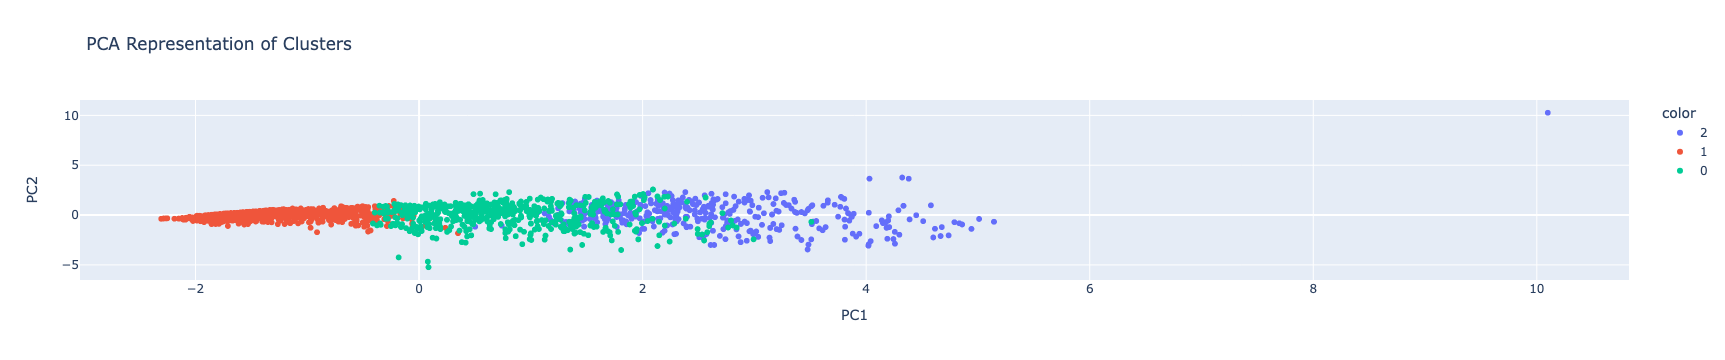

In [228]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(x=X_pca['PC1'],
                 y=X_pca['PC2'],
                 color=labels.astype(str),
                title='PCA Representation of Clusters')
fig.update_layout(xaxis_title='PC1',yaxis_title='PC2')

fig.show()

In [229]:
## putting clustering into dataset

df['cluster'] = labels

## save data to local device, to be sent to marketing team 
# df.to_csv('...../path/to/save')